In [119]:
# Tutorial is based on https://stackabuse.com/implementing-svm-and-kernel-svm-with-pythons-scikit-learn/
# Forged bank notes dataset

import pandas as pd
import numpy as np
import sklearn

from sklearn.datasets import load_breast_cancer
import pandas as pd

# read data into dataframe
heartdiseasedata = pd.read_csv("./heart_cleveland_upload.csv")
heartdiseasedata.rename(columns={'condition': 'class'}, inplace=True)
heartdiseasedata.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,class
0,69,1,0,160,234,1,2,131,0,0.1,1,1,0,0
1,69,0,0,140,239,0,0,151,0,1.8,0,2,0,0
2,66,0,0,150,226,0,0,114,0,2.6,2,0,0,0
3,65,1,0,138,282,1,2,174,0,1.4,1,1,0,1
4,64,1,0,110,211,0,2,144,1,1.8,1,0,0,0


In [120]:
heartdiseasedata['class'].unique()

array([0, 1])

In [121]:
heartdiseasedata['class'].value_counts()

class
0    160
1    137
Name: count, dtype: int64

In [122]:
heartdiseasedata['class'].value_counts(normalize=True)

class
0    0.538721
1    0.461279
Name: proportion, dtype: float64

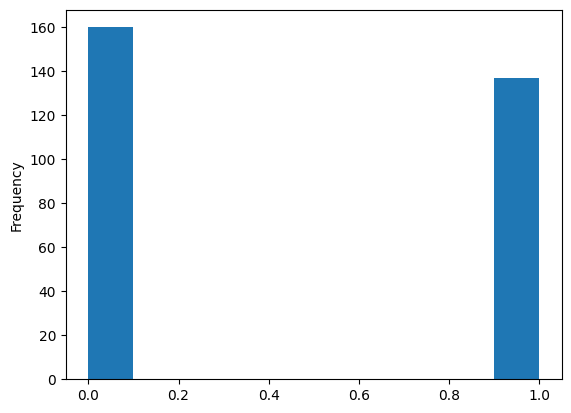

In [123]:
heartdiseasedata['class'].plot.hist();

In [124]:
heartdiseasedata.describe().T

,count,mean,std,min,25%,50%,75%,max
age,297.0,54.542088,9.049736,29.0,48.0,56.0,61.0,77.0
sex,297.0,0.676768,0.468500,0.0,0.0,1.0,1.0,1.0
cp,297.0,2.158249,0.964859,0.0,2.0,2.0,3.0,3.0
trestbps,297.0,131.693603,17.762806,94.0,120.0,130.0,140.0,200.0
chol,297.0,247.350168,51.997583,126.0,211.0,243.0,276.0,564.0
fbs,297.0,0.144781,0.352474,0.0,0.0,0.0,0.0,1.0
restecg,297.0,0.996633,0.994914,0.0,0.0,1.0,2.0,2.0
thalach,297.0,149.599327,22.941562,71.0,133.0,153.0,166.0,202.0
exang,297.0,0.326599,0.469761,0.0,0.0,0.0,1.0,1.0
oldpeak,297.0,1.055556,1.166123,0.0,0.0,0.8,1.6,6.2


In [135]:
# predictors vs class
y = heartdiseasedata['class']
X = heartdiseasedata.drop('class', axis=1) # axis=1 means dropping from the column axis

X_min_max = X.copy()
for col in X_min_max.columns:
    if pd.api.types.is_numeric_dtype(X_min_max[col]):
        X_min_max[col] = (X_min_max[col] - X_min_max[col].min()) / (X_min_max[col].max() - X_min_max[col].min())
X = X_min_max.copy()

In [136]:
from sklearn.model_selection import train_test_split
SEED = 42
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.20, random_state = SEED)

In [137]:
xtrain_samples = X_train.shape[0]
xtest_samples = X_test.shape[0]

print(f'There are {xtrain_samples} samples for training and {xtest_samples} samples for testing.')

There are 237 samples for training and 60 samples for testing.


In [138]:
from sklearn.svm import SVC
svc = SVC(kernel='linear',verbose=1)

In [139]:
svc.fit(X_train, y_train)

[LibSVM]*.*
optimization finished, #iter = 277
obj = -80.165160, rho = -2.025749
nSV = 93, nBSV = 81
Total nSV = 93


SVC(kernel='linear', verbose=1)

In [140]:
y_pred = svc.predict(X_test)

              precision    recall  f1-score   support

           0       0.77      0.72      0.74        32
           1       0.70      0.75      0.72        28

    accuracy                           0.73        60
   macro avg       0.73      0.73      0.73        60
weighted avg       0.74      0.73      0.73        60



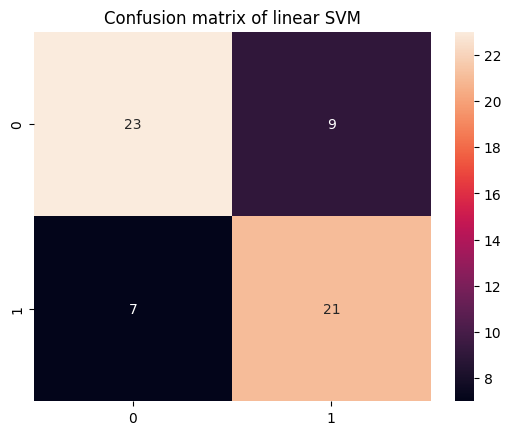

In [141]:
import seaborn as sns
from sklearn.metrics import classification_report, confusion_matrix

cm = confusion_matrix(y_test,y_pred)
sns.heatmap(cm, annot=True, fmt='d').set_title('Confusion matrix of linear SVM') # fmt='d' formats the numbers as digits, which means integers

print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.86      0.91      0.89       128
           1       0.89      0.83      0.86       109

    accuracy                           0.87       237
   macro avg       0.88      0.87      0.87       237
weighted avg       0.87      0.87      0.87       237



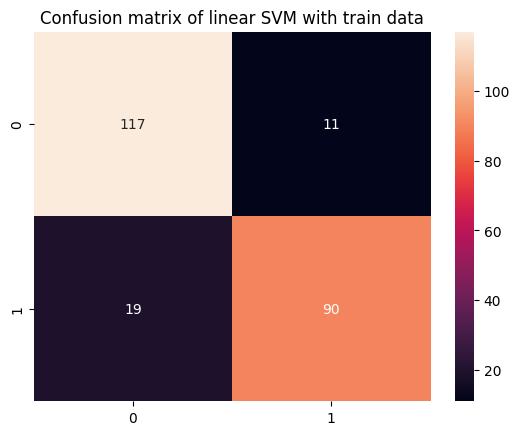

In [142]:
y_pred_train = svc.predict(X_train)

cm_train = confusion_matrix(y_train,y_pred_train)
sns.heatmap(cm_train, annot=True, fmt='d').set_title('Confusion matrix of linear SVM with train data')

print(classification_report(y_train,y_pred_train))

In [143]:
X_test.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
167,0.770833,0.0,1.000000,0.792453,0.232877,1.0,0.0,0.717557,1.0,0.161290,0.5,0.666667,1.0
211,0.625000,1.0,1.000000,0.433962,0.116438,0.0,0.0,0.694656,1.0,0.000000,0.0,0.333333,1.0
63,0.250000,1.0,0.333333,0.386792,0.175799,0.0,0.0,0.465649,0.0,0.000000,0.5,0.000000,0.5
154,0.166667,0.0,0.666667,0.245283,0.203196,0.0,0.0,0.755725,0.0,0.000000,0.0,0.000000,0.0
5,0.729167,1.0,0.000000,0.716981,0.230594,0.0,1.0,0.641221,0.0,0.096774,0.5,0.000000,1.0


In [144]:
svc.get_params()

{'C': 1.0,
 'break_ties': False,
 'cache_size': 200,
 'class_weight': None,
 'coef0': 0.0,
 'decision_function_shape': 'ovr',
 'degree': 3,
 'gamma': 'scale',
 'kernel': 'linear',
 'max_iter': -1,
 'probability': False,
 'random_state': None,
 'shrinking': True,
 'tol': 0.001,
 'verbose': 1}

In [145]:
print(svc.n_support_)

[48 45]


In [146]:
print(svc.coef_)

[[ 0.06821027  0.85869947  0.99825378  0.93674534  0.54751794 -0.53954648
   0.25467342 -2.05092106  0.346637    0.84999123  0.44868406  1.76576666
   1.23231703]]


In [147]:
print(np.matmul(svc.dual_coef_,svc.support_vectors_))

[[ 0.06821027  0.85869947  0.99825378  0.93674534  0.54751794 -0.53954648
   0.25467342 -2.05092106  0.346637    0.84999123  0.44868406  1.76576666
   1.23231703]]


In [148]:
decision_function = svc.decision_function(X_test)
print(decision_function)

[ 1.00128314  1.08695668 -0.47317551 -2.55778993  0.15906478 -0.97300541
  2.80427787  2.43150195  1.15085325 -1.31769803 -0.86270786  0.66025321
 -0.67969544 -2.40300459 -2.37302252  0.56430701  0.50904861 -1.74251639
  1.67757979 -1.86125558  1.75363444  0.3977809  -1.95565456 -1.87691421
 -1.32306996  2.06388876  2.03067557  2.64778385 -0.21666463  0.78850586
  0.39605709  1.09821526 -1.02272021 -0.85864898 -0.0336511   2.69891016
  0.5050751  -1.68708991  2.2897472  -1.60539322 -1.91044861  0.75572465
  0.36839385 -0.77654306 -1.68847732  1.85599022 -1.52312834  0.58412149
  0.43889846 -1.89743484 -0.40202339  1.25845208 -1.07196415  0.07625138
  2.07912259 -0.00918241 -0.95192367  2.02414929 -0.67580796 -0.21605154]


In [149]:
# write parameters and data to file
weights=open("../data-linear-model/weights.txt","w")
bias=open("../data-linear-model/bias.txt","w")
xtestSample="../data-linear-model/xtest.txt"
ytestSample=open("../data-linear-model/ytest.txt","w")
ytestClassificationScore="../data-linear-model/yclassificationscore.txt"

np.savetxt(weights,svc.coef_, delimiter=' ')
np.savetxt(bias,svc.intercept_, delimiter=' ')
#np.savetxt(xtestSample,X_test.head(1).iloc[0].values, delimiter=' ')
with open(xtestSample, "w") as f1:
    for item in X_test.head(1).iloc[0].values:
        f1.write(str(item) + " ")

np.savetxt(ytestSample,y_test.head(1), delimiter=' ')
with open(ytestClassificationScore, "w") as f2:
    f2.write(str(decision_function[0]))


weights.close()
bias.close()
ytestSample.close()
f1.close()
f2.close()